### Exercici 1
#### Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import statistics #library for statistics
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
df_flight = pd.read_csv('DelayedFlights.csv', index_col=0) 
#lee el fichero CSV y asigna el índice a la columna 0

In [3]:
#we split the dataset into train and test sets at 50%
#seed for random generator = 1
train, test = train_test_split(df_flight, test_size=0.4, random_state=1)

Description of TRAIN and TEST dataset


In [27]:
print("The shape of the original dataset is", df_flight.shape)
print("The shape of the TRAIN dataset (60%) is", train.shape)
print("The shape of the TEST dataset (40%) is", test.shape)

The shape of the original dataset is (1936758, 29)
The shape of the TRAIN dataset (60%) is (1162054, 29)
The shape of the TEST dataset (40%) is (774704, 29)


In [7]:
#we can compare both datasets to see if there are any differences

print('\nDescription for each column of TRAIN dataset (only numerical values):')
print(train.describe().T.astype(int))

print('\nDescription for each column of TEST dataset (only numerical values):')
print(test.describe().T.astype(int))


Description for each column of TRAIN dataset (only numerical values):
                     count  mean   std   min   25%   50%   75%   max
Year               1162054  2008     0  2008  2008  2008  2008  2008
Month              1162054     6     3     1     3     6     9    12
DayofMonth         1162054    15     8     1     8    16    23    31
DayOfWeek          1162054     3     1     1     2     4     6     7
DepTime            1162054  1518   450     1  1203  1545  1900  2400
CRSDepTime         1162054  1467   424     0  1135  1510  1815  2359
ArrTime            1157794  1609   548     1  1316  1715  2031  2400
CRSArrTime         1162054  1634   464     0  1325  1706  2014  2400
FlightNum          1162054  2184  1944     1   610  1543  3423  9741
ActualElapsedTime  1157026   133    71    14    80   116   165   750
CRSElapsedTime     1161933   134    71   -25    82   116   165   660
AirTime            1157026   108    68     0    58    90   137   664
ArrDelay           1157026    42

Text(0, 0.5, 'Arrival Delay (s)')

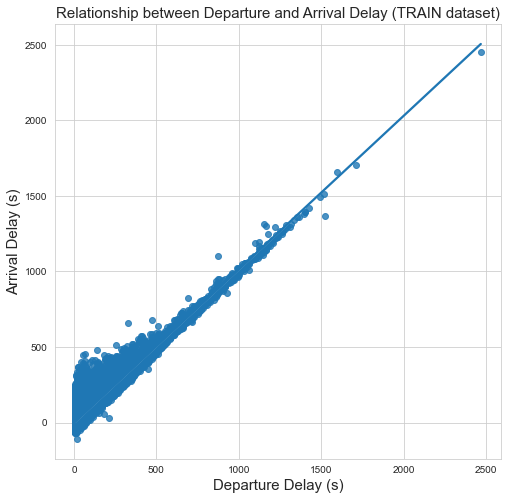

In [28]:
fig1, ax1 = plt.subplots(figsize=(8,8))
fig1 = sns.regplot(x="DepDelay", y="ArrDelay", data=train)
ax1.set_title("Relationship between Departure and Arrival Delay (TRAIN dataset)", fontsize=15)
ax1.set_xlabel("Departure Delay (s)", fontsize=15)
ax1.set_ylabel("Arrival Delay (s)", fontsize=15)

Text(0, 0.5, 'Arrival Delay (s)')

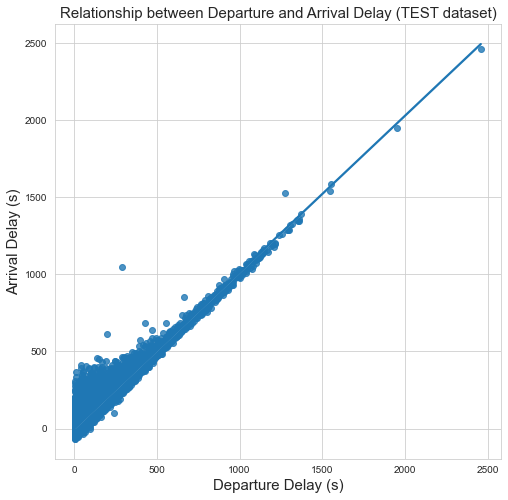

In [23]:
fig1, ax1 = plt.subplots(figsize=(8,8))
fig1 = sns.regplot(x="DepDelay", y="ArrDelay", data=test)
ax1.set_title("Relationship between Departure and Arrival Delay (TEST dataset)", fontsize=15)
ax1.set_xlabel("Departure Delay (s)", fontsize=15)
ax1.set_ylabel("Arrival Delay (s)", fontsize=15)

Text(0, 0.5, 'Count')

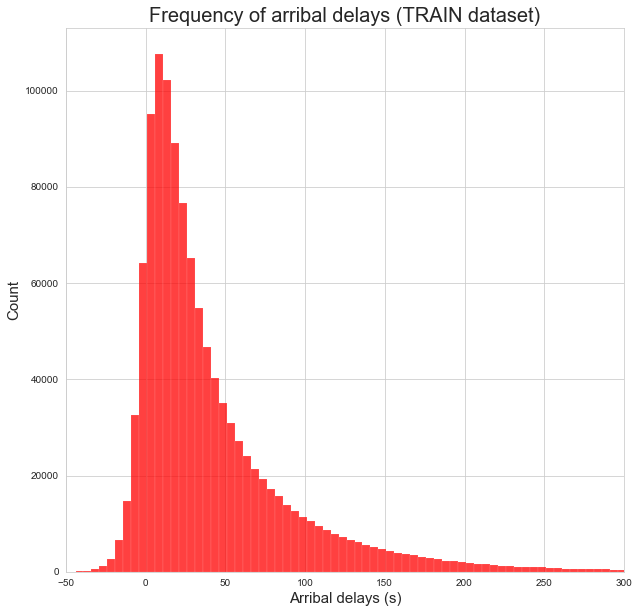

In [29]:
figDelay, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
sns.histplot(data=train, x="ArrDelay", color="red", binwidth=5)
plt.xlim(-50,300)
ax.set_title("Frequency of arribal delays (TRAIN dataset)", fontsize=20)
ax.set_xlabel("Arribal delays (s)", fontsize=15)
ax.set_ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

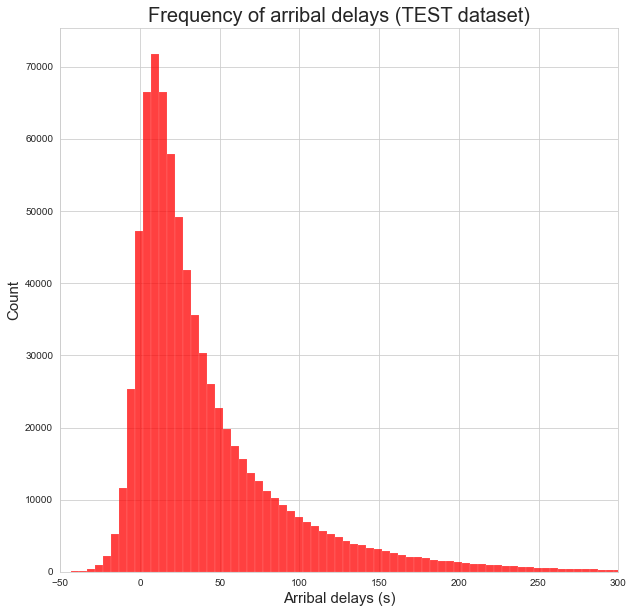

In [30]:
figDelay, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
sns.histplot(data=test, x="ArrDelay", color="red", binwidth=5)
plt.xlim(-50,300)
ax.set_title("Frequency of arribal delays (TEST dataset)", fontsize=20)
ax.set_xlabel("Arribal delays (s)", fontsize=15)
ax.set_ylabel("Count", fontsize=15)

#### Conclusions

- If we compare both datasets we can observe that numerical value for mean and standard columns are almost equal, with very little differences. 
- For max values you can observe some little more differences but they are compensate with the rest of values.
- For the distribution plot and the regression line we can observe that are almost the same. There are some outliers values that are diferent but very few.
- For the histogram about delays, it happens the same, they are very similar.
- As a conclusion, we can see that the split dataset for train and test is well done and we can trust on the results obtained after training the algorithm with this datasets.

### Exercici 2
#### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [9]:
#STANDARIZE DATA
from sklearn.preprocessing import StandardScaler

#we apply the StandardScaler function to a numeric atribute 
#like ArrDelay and DepDelay

#removing nan data for columns that we will use
df_flight_delay = df_flight[['ArrDelay','DepDelay']].dropna()

#initializing the Scaler
scaler = StandardScaler()
#the fit method compute the mean and std
#the transform method performs standardization by centering and scaling
array_flight_trans = scaler.fit_transform(df_flight_delay[['ArrDelay','DepDelay']])

#it returns data transformed as a numpy array
print('Data standarized:')
print(array_flight_trans,'\n')

Data standarized:
[[-0.98970118 -0.65880113]
 [-0.70793514 -0.45229036]
 [-0.49661061 -0.65880113]
 ...
 [ 1.00027146  0.69290571]
 [-0.5846625  -0.60248001]
 [-0.83120778 -0.67757484]] 



In [10]:
#DUMMY COLUMNS
#we are going to apply dummy variables for the categorical atribute 'Unique Carrier'
#applying value counts to know how many of each are
print('Before aplying Dummy variables we have:','\n')
print('For atribute Unique Carrier:')
print(df_flight['UniqueCarrier'].value_counts(),'\n')

#now we apply the get_dummies method
df_flight_dummyUC = pd.get_dummies(df_flight['UniqueCarrier'])
print('After aplying Dummy variables we have:','\n')
print(df_flight_dummyUC)


Before aplying Dummy variables we have: 

For atribute Unique Carrier:
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64 

After aplying Dummy variables we have: 

         9E  AA  AQ  AS  B6  CO  DL  EV  F9  FL  HA  MQ  NW  OH  OO  UA  US  \
0         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
7009710   0   0   0   0   0   0   1   0

### Exercici 3
#### Resumeix les noves columnes generades de manera estadística i gràfica.


Mean for Arribal Delay and Departure Delay:
-2.7296099072796793e-17
4.1445264898868565e-17

Std deviation for for Arribal Delay and Departure Delay:
0.9999999999999998
1.0

Quantile 75% for Arribal Delay and Departure Delay:
0.24302523613261132
0.18601564552535232


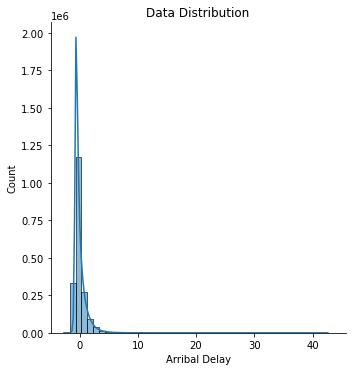

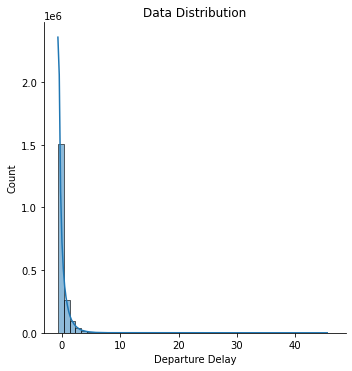

In [11]:
#summary of new columns graphical and statistical from STANDARIZE DATA
#we convert to a list
ArrDelay_trans = array_flight_trans[:,0]
DepDelay_trans = array_flight_trans[:,1]

print('\nMean for Arribal Delay and Departure Delay:')
print(np.mean(ArrDelay_trans))
print(np.mean(DepDelay_trans))

print('\nStd deviation for for Arribal Delay and Departure Delay:')
print(np.var(ArrDelay_trans))
print(np.var(DepDelay_trans))

print('\nQuantile 75% for Arribal Delay and Departure Delay:')
print(np.quantile(ArrDelay_trans, 0.75))
print(np.quantile(DepDelay_trans, 0.75))

fig1 = sns.displot(data=ArrDelay_trans, kde=True, binwidth=1)
fig1.set(title='Data Distribution', xlabel='Arribal Delay', ylabel='Count')

fig2 = sns.displot(data=DepDelay_trans, kde=True, binwidth=1)
fig2.set(title='Data Distribution', xlabel='Departure Delay', ylabel='Count')

In [12]:
#summary of new columns graphical and statistical from DUMMY DATA
#dummy variables are only 0 and 1, there is no meaning to represent graphical or numerical
print(df_flight_dummyUC.describe().T.astype(int))



      count  mean  std  min  25%  50%  75%  max
9E  1936758     0    0    0    0    0    0    1
AA  1936758     0    0    0    0    0    0    1
AQ  1936758     0    0    0    0    0    0    1
AS  1936758     0    0    0    0    0    0    1
B6  1936758     0    0    0    0    0    0    1
CO  1936758     0    0    0    0    0    0    1
DL  1936758     0    0    0    0    0    0    1
EV  1936758     0    0    0    0    0    0    1
F9  1936758     0    0    0    0    0    0    1
FL  1936758     0    0    0    0    0    0    1
HA  1936758     0    0    0    0    0    0    1
MQ  1936758     0    0    0    0    0    0    1
NW  1936758     0    0    0    0    0    0    1
OH  1936758     0    0    0    0    0    0    1
OO  1936758     0    0    0    0    0    0    1
UA  1936758     0    0    0    0    0    0    1
US  1936758     0    0    0    0    0    0    1
WN  1936758     0    0    0    0    0    0    1
XE  1936758     0    0    0    0    0    0    1
YV  1936758     0    0    0    0    0   